<a href="https://colab.research.google.com/github/renisio/Deep-learning-classification-of-apple-leaf-diseases-Comparison-of-neural-networks/blob/main/3_EfficientNetB5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#GPU

import tensorflow
device_name = tensorflow.test.gpu_device_name()
if device_name != '/device:GPU:0':
   raise SystemError('No hay GPU')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
!pip install  visualkeras
!pip3 install ann_visualizer
!pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=85ea09ee6c226a6e7afb30cb79fd50bf4264192cbbef6a06451b68c7431ae072
  Stored in directory: /root/.cache/pip/wheels/6e/0f/ae/f5dba91db71b1b32bf03d0ad18c32e86126093aba5ec6b6488
Successfully built ann_visualizer


In [ ]:
import pandas as pd # linear algebra
import numpy as np # processamento de dados, E/S de arquivo CSV (por exemplo, pd.read_csv)


import seaborn as sns  #Ele fornece uma interface de alto nível para desenhar gráficos estatísticos atraentes e informativos.
import matplotlib.pyplot as plt #biblioteca para a visualização de dados


import warnings
warnings.filterwarnings('ignore')

from glob import glob #para localizar todos os arquivos em um diretório que correspondem a um determinado padrão.
                      # Os arquivos foram então concatenados em um único dataframe para ser usado para análise posterior
import os  # importar aquivos no sistema operacional
from tqdm import tqdm #seus loops mostrem instantaneamente um medidor de progresso inteligente
import cv2 #sta biblioteca é capaz de processar imagens e vídeos em tempo real, ao mesmo tempo em que possui recursos analíticos


from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.applications import EfficientNetB0
import visualkeras


In [ ]:
labels = ['healthy', 'rust', 'scab']

In [ ]:
# X são os dados e y suas respctiveis clases
X_train = []  # Criando e irei addcionar neste diretorio
y_train = []  # Criando e irei addcionar neste diretorio
image_size = 224 # Alterando o tamanho da imagem por 224 x 224 para cada item do diretorio
for i in labels: # Percorrer cada item do diretorio
    folderPath = os.path.join('/content/drive/MyDrive/Mestrado/FOlha de maça/separadas_por_rotulo',i) # Link para abrir a pasta train
    for j in tqdm(os.listdir(folderPath)): #Faça com que seus loops mostrem instantaneamente um medidor de progresso inteligente
        img = cv2.imread(os.path.join(folderPath,j)) #retorna uma matriz 2D ou 3D com base no número de canais de cores presentes na imagem.
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)  # Todas imgaens em RGB da pasta train
        img = cv2.resize(img,(image_size, image_size)) # Alterando o tamanho da imagem por 224 x 224 as todas imagens da pasta train
        X_train.append(img)
        y_train.append(i)

X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 592/592 [00:29<00:00, 20.01it/s]


In [ ]:
print("Imagens de treino variavel X", X_train.shape)
print("Imagens de treino variavel y", y_train.shape)

Imagens de treino variavel X (1730, 224, 224, 3)
Imagens de treino variavel y (1730,)


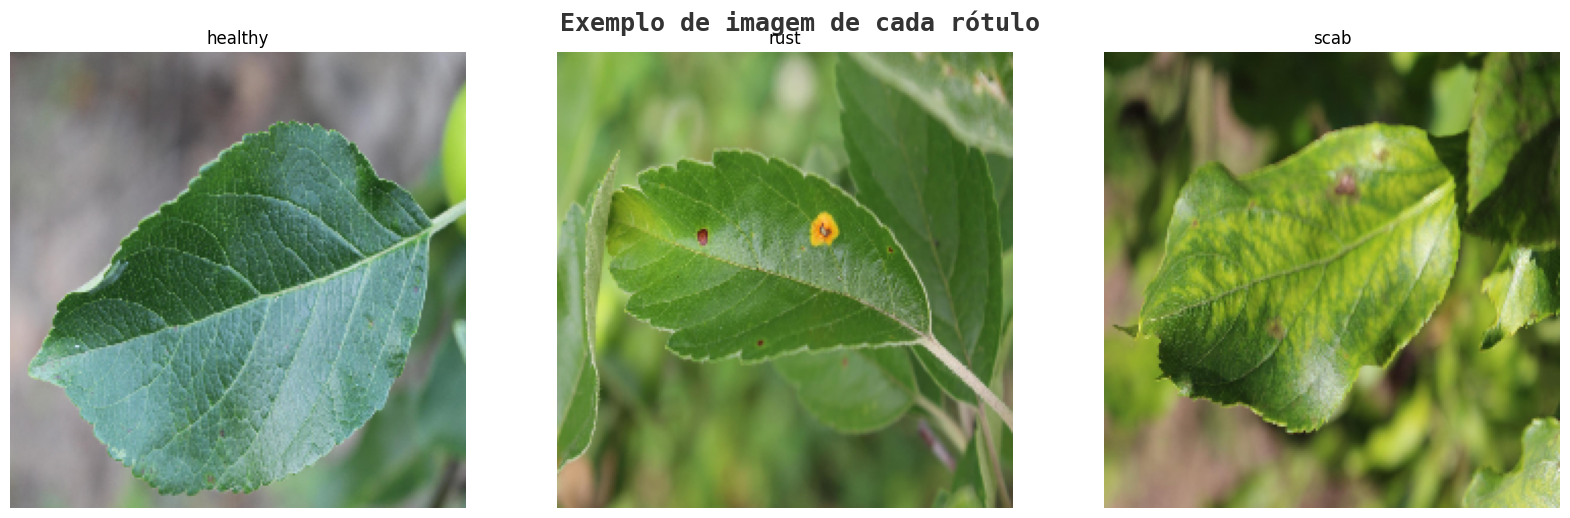

In [ ]:
#  ax criar uma grade de subplots,
#  plt.subplots1,4, linhas e colunas   figsize=(20,20)) tamnhanho

k=0
fig, ax = plt.subplots(1,3,figsize=(20,20))
fig.text(s='Exemplo de imagem de cada rótulo',size=18,fontweight='bold',
             fontname='monospace',y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

In [ ]:
X_train, y_train = shuffle(X_train,y_train, random_state=101)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.2,random_state=101)


In [ ]:
y_train_new = []
for i in y_train: #para  [item]  em  [sequência] : Execute o  código
    y_train_new.append(labels.index(i)) # adcionou no y_train_new o vetor de as clases do y_train
y_train = y_train_new # o y_train agora é y_train_new
y_train = tf.keras.utils.to_categorical(y_train) #converter o vetor y_train de classe na matriz da classe binária

# igual de linhas do comprimento do vetor de entrada e o número da coluna que é igual ao número da classe que definimos em nosso código

y_test_new = []
for i in y_test: #para  [item]  em  [sequência] : Execute o  código
    y_test_new.append(labels.index(i)) #adcionou no y_train_new o vetor de as clases do y_train
y_test = y_test_new # o y_train agora é y_train_new
y_test = tf.keras.utils.to_categorical(y_test)  #converter o vetor y_test de classe na matriz da classe binária



In [ ]:
print("Imagens de Treino variavel X", X_train.shape)
print("Imagens de Treino variavel y", y_train.shape)
print("Imagens de Teste variavel X", X_test.shape)
print("Imagens de Teste variavel y", y_test.shape)

Imagens de Treino variavel X (1384, 224, 224, 3)
Imagens de Treino variavel y (1384, 3)
Imagens de Teste variavel X (346, 224, 224, 3)
Imagens de Teste variavel y (346, 3)


In [ ]:
!pip install efficientnet

from efficientnet.keras import EfficientNetB5

conv_base = EfficientNetB5(weights='imagenet', include_top=False, input_shape=(224,224,3))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.8 MB/s eta 0:00:00
115515256/115515256 [==============================] - 2s 0us/step


In [ ]:
# Adicionando camadas adicionais

numberOfClass=3

conv_base = EfficientNetB5(weights='imagenet', include_top=False, input_shape=(224,224,3))

model = conv_base.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(numberOfClass, activation='softmax')(model)
model = tf.keras.models.Model(inputs=conv_base.input, outputs=model)

In [ ]:
model.compile(loss='categorical_crossentropy', # A função de perda vai calcular o tanto que a rede esta errando, a diferença do resultado ideal com quanto a rede esta oferencendo na pratica,,
                                               # Saida é uma probalidade. Usado como uma função de perda para o modelo de classificação multiclasse onde há dois ou mais rótulos de saída.
              optimizer = 'Adam', # Quem vai fazer os calculos para ajustar os pessos da rede neural
              metrics= ['accuracy'])

In [ ]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("CovidModelEfficientNet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', #monitor = metrica a ser monitorada
                              factor = 0.1, #fator pelo qual a taxa de aprendizado será reduzida.
                              patience = 2, #número de épocas sem melhora após as quais a taxa de aprendizado será reduzida.
                              min_delta = 0.001, #limite para medir o novo ótimo, para focar apenas em mudanças significativas.
                              mode='auto',verbose=1)

In [ ]:
# Fazendo a rede aprender na pratica

hist = model.fit(X_train,
                 y_train,
                 validation_split=0.1,
                 epochs =15, # 15  epocas
                 verbose=1, #mostra a barra de progresso
                 batch_size=32, # configura  a  quantidade  de imagens por lote no processamento, Vai processar de 32 imagens por vez
                  callbacks=[tensorboard,checkpoint,reduce_lr] # definidos anteriormente
                 )

Epoch 1/15
39/39 [==============================] - ETA: 0s - loss: 0.4577 - accuracy: 0.8088
Epoch 1: val_accuracy improved from -inf to 0.66187, saving model to CovidModelEfficientNet.h5
39/39 [==============================] - 171s 1s/step - loss: 0.4577 - accuracy: 0.8088 - val_loss: 2.0796 - val_accuracy: 0.6619 - lr: 0.0010
Epoch 2/15
39/39 [==============================] - ETA: 0s - loss: 0.1299 - accuracy: 0.9582
Epoch 2: val_accuracy improved from 0.66187 to 0.95683, saving model to CovidModelEfficientNet.h5
39/39 [==============================] - 41s 1s/step - loss: 0.1299 - accuracy: 0.9582 - val_loss: 0.5009 - val_accuracy: 0.9568 - lr: 0.0010
Epoch 3/15
39/39 [==============================] - ETA: 0s - loss: 0.1218 - accuracy: 0.9631
Epoch 3: val_accuracy did not improve from 0.95683
39/39 [==============================] - 36s 933ms/step - loss: 0.1218 - accuracy: 0.9631 - val_loss: 5.4647 - val_accuracy: 0.6691 - lr: 0.0010
Epoch 4/15
39/39 [==========================

In [ ]:
results = model.evaluate(X_train,y_train)

44/44 [==============================] - 9s 210ms/step - loss: 0.0072 - accuracy: 0.9986


In [ ]:
results2 = model.evaluate(X_test,y_test)

11/11 [==============================] - 3s 311ms/step - loss: 0.0908 - accuracy: 0.9769


In [ ]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


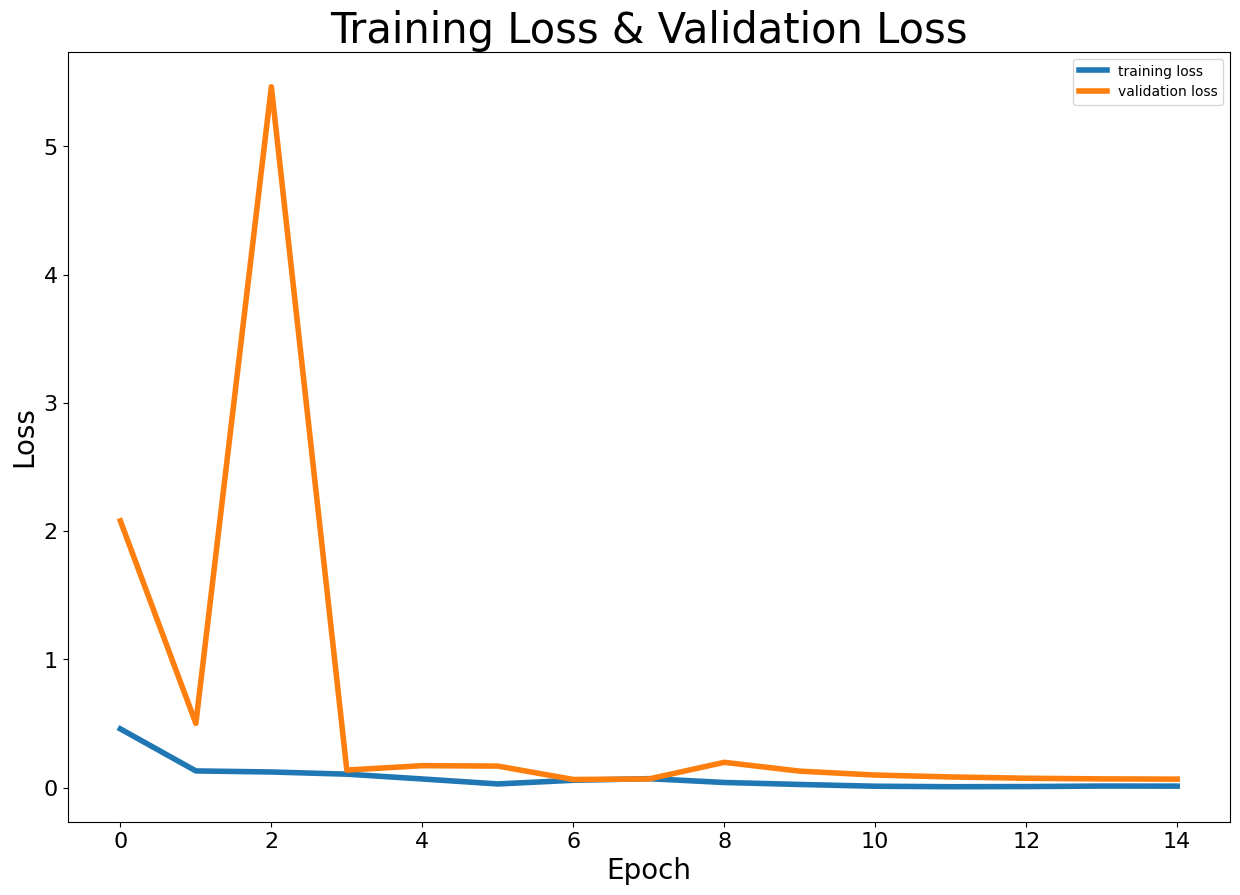

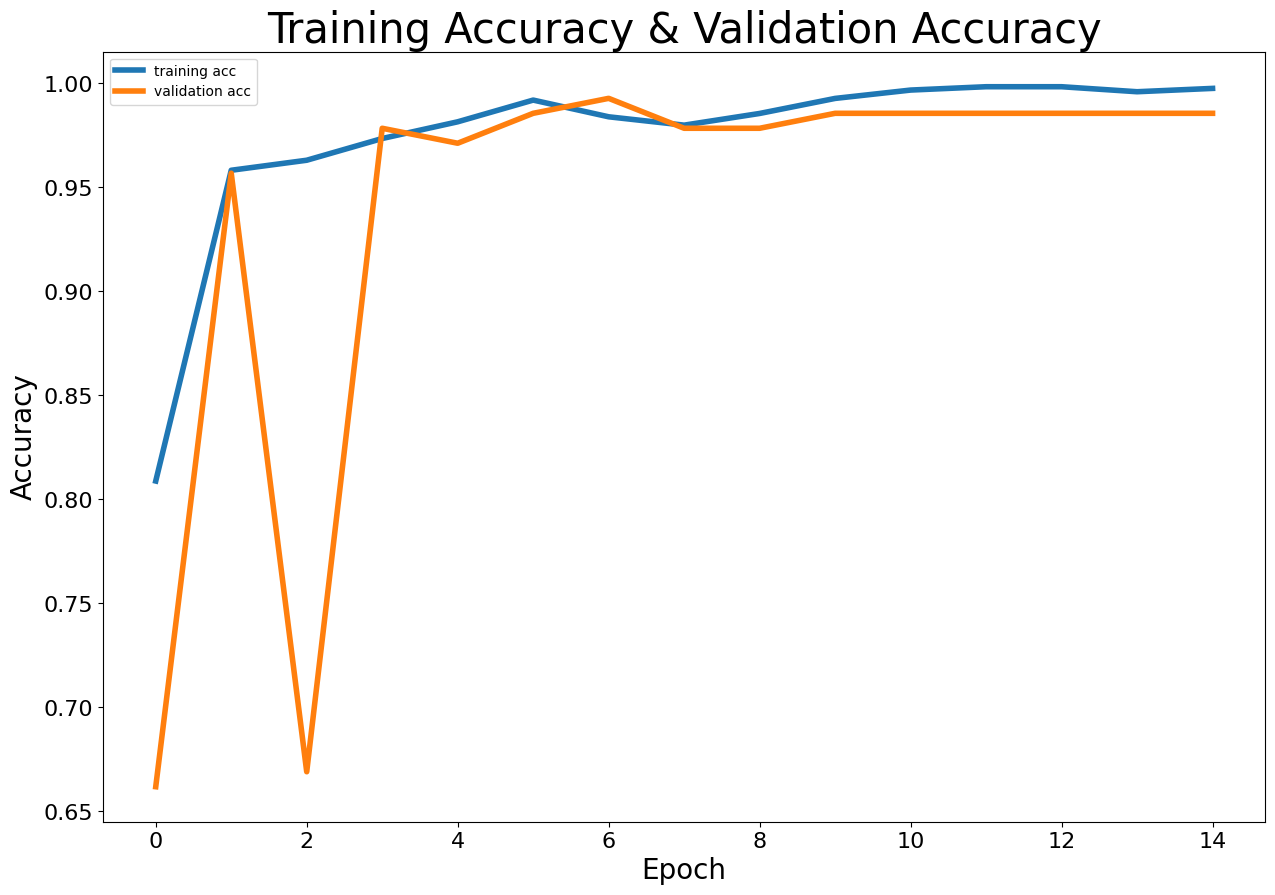

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(hist.history["loss"],label = "training loss", linewidth=4)
plt.plot(hist.history["val_loss"],label = "validation loss", linewidth=4)
plt.title("Training Loss & Validation Loss", fontsize=30)
plt.xlabel("Epoch", fontsize=20)
plt.ylabel("Loss", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend()
plt.show()

plt.figure(figsize=(15,10))
plt.plot(hist.history["accuracy"],label = "training acc", linewidth=4)
plt.plot(hist.history["val_accuracy"],label = "validation acc", linewidth=4)
plt.title("Training Accuracy & Validation Accuracy", fontsize=30)
plt.xlabel("Epoch", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend()
plt.show()


In [ ]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

11/11 [==============================] - 6s 203ms/step


In [ ]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       103
           1       0.99      0.99      0.99       125
           2       0.98      0.96      0.97       118

    accuracy                           0.98       346
   macro avg       0.98      0.98      0.98       346
weighted avg       0.98      0.98      0.98       346



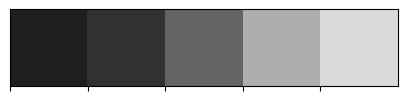

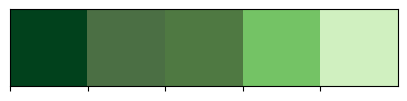

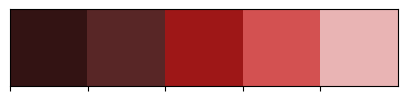

In [ ]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

[[101   0   2]
 [  1 124   0]
 [  4   1 113]]


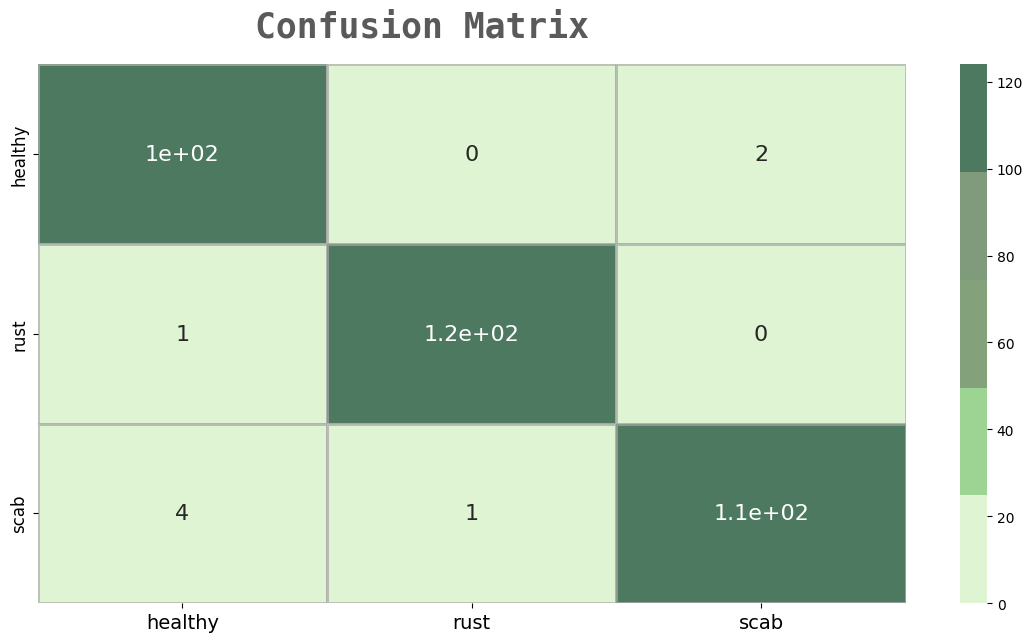

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(14,7))

sns.heatmap(confusion_matrix(y_test_new, pred),
            ax=ax,
            xticklabels=labels,
            yticklabels=labels,
            annot=True,
            cmap=colors_green[::-1],
            alpha=0.7,
            linewidths=2,
            linecolor=colors_dark[3],
            annot_kws={"fontsize": 16}, # tamanho da fonte dos resultados
            )
ax.tick_params(axis='both', which='major', labelsize=14) # tamanho da fonte dos eixos x e y
ax.set_xticklabels(labels, fontsize=14) # tamanho da fonte das barras laterais x
ax.set_yticklabels(labels, fontsize=12) # tamanho da fonte das barras laterais y
fig.text(s='Confusion Matrix',
         size=25,
         fontweight='bold',
         fontname='monospace',
         color=colors_dark[1],
         y=0.92,
         x=0.28,
         alpha=0.8)
print(confusion_matrix(y_test_new,pred))
plt.show()

In [ ]:
# obter as previsões para cada imagem de teste
y_pred = model.predict(X_test)

# obter a classe prevista para cada imagem de teste (classe com maior probabilidade)
y_pred_classes = y_pred.argmax(axis=-1)

# armazenar as previsões em uma matriz
predictions = y_pred_classes.reshape(-1, 1)

import pandas as pd

# criar um DataFrame a partir da matriz de previsões
df_predictions = pd.DataFrame(predictions, columns=['Predicted Class'])

# imprimir o DataFrame
print(df_predictions)

11/11 [==============================] - 2s 189ms/step
     Predicted Class
0                  1
1                  2
2                  1
3                  0
4                  2
..               ...
341                1
342                2
343                2
344                1
345                2

[346 rows x 1 columns]


In [ ]:
from google.colab import files
import pandas as pd

# criar um DataFrame a partir da matriz de previsões
df_predictions = pd.DataFrame(predictions, columns=['Predicted Class'])

# salvar o DataFrame em um arquivo Excel
df_predictions.to_excel('predictions.xlsx', index=False)

# baixar o arquivo para o seu computador
files.download('predictions.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np

# Encontra o índice do valor máximo em cada linha da matriz
y_test_pred = np.argmax(y_test, axis=1)

# Transforma o vetor unidimensional em um vetor coluna
y_test_pred_col = y_test_pred.reshape(-1, 1)

from google.colab import files

# Transforma o vetor unidimensional em um vetor coluna
y_test_pred_col = y_test_pred.reshape(-1, 1)

# Cria um DataFrame a partir do vetor coluna
df_y_test_pred = pd.DataFrame(y_test_pred_col, columns=['Predicted Class'])

# Escreve o DataFrame em um arquivo Excel
filename = 'y_test_pred.xlsx'
df_y_test_pred.to_excel(filename, index=False)

# Baixa o arquivo Excel para o computador
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>